<h1> Sentiment Analysis Food Estate Merauke

<h4> Data Overview <h4>

In [105]:
import pandas as pd

In [106]:
df = pd.read_csv('dataset/trainData135.csv').sample(frac=1).reset_index(drop=True)
df

,komentar,label
0,"Dibangun salah, didiamkan salah, maka pemerint...",0
1,"Teruslah membangun negri, Papua harus dibangun...",1
2,saya setuju proyek estet dilanjutkan,1
3,sedih & miris sekali mendengar suara masyaraka...,-1
4,Proyek ini untuk membantu masyarakat supaya ha...,1
...,...,...
130,"Gak papa dijadikan food estates, dari pada imp...",1
131,Proyek tetap dan boleh jalan tapi masyarakat t...,0
132,Warga Lokal Papua yang terdampak ekonominya di...,0
133,Semoga saudra2 kami di Papua sehat2 semua dan ...,0


In [107]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [108]:
def lower_cases(komentar):
    return komentar.lower()

In [109]:
def remove_numbers_and_symbols(komentar):
    Ckomentar = re.sub(r'[^a-zA-Z\s]', ' ', komentar)
    return Ckomentar

In [110]:
def remove_brackets(komentar):
  return re.sub('\[[^]]*\]',' ', komentar)

In [111]:
def remove_emoticons(komentar):
    emPattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  
        "\U0001F300-\U0001F5FF"  
        "\U0001F680-\U0001F6FF"  
        "\U0001F1E0-\U0001F1FF"  
        "\U00002700-\U000027BF" 
        "\U000024C2-\U0001F251"
        "]+", 
        flags=re.UNICODE
    )
    return emPattern.sub(r' ', komentar)

In [112]:
true_meaning = {
    'tdk': 'tidak',
    'skrg':'sekarang',
    'tsb':'tersebut',
    'dg':'dengan',
    'sy':'saya',
    'hrs': 'harus',
    'gk':'tidak',
    'knp': 'kenapa',
    'jgn': 'jangan',
    'ykin':'yakin',
    'bgs':'bagus',
    'wkt':'waktu',
    'yg': 'yang',
    'dlm': 'dalam',
    'blm': 'belum',
    'utk': 'untuk',
    'jg': 'juga'
}

def replace_word(komentar):
    words = komentar.split()
    replaced_words = [true_meaning.get(word, word)for word in words]
    return ' '.join(replaced_words)

In [113]:
swFactory = StopWordRemoverFactory()
stopwords = swFactory.create_stop_word_remover()

def remove_stopwords(komentar):
    return stopwords.remove(komentar)

In [114]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(komentar):
    return stemmer.stem(komentar)

In [115]:
def clean_data(komentar):
    komentar = lower_cases(komentar)
    komentar = remove_numbers_and_symbols(komentar)
    komentar = remove_brackets(komentar)
    komentar = remove_emoticons(komentar)
    komentar = replace_word(komentar)
    komentar = remove_stopwords(komentar)
    komentar = stemming(komentar)
    
    return komentar

In [116]:
df['komentar'] = df['komentar'].apply(clean_data)
df

,komentar,label
0,bangun salah diam salah perintah tegas program...,0
1,terus bangun negri papua bangun sedia pangan b...,1
2,tuju proyek estet lanjut,1
3,sedih miris sekali dengar suara masyarakat pap...,-1
4,proyek untuk bantu masyarakat harga beras murah,1
...,...,...
130,gak papa jadi food estates pada impor beras gula,1
131,proyek tetap boleh jalan masyarakat tetap perh...,0
132,warga lokal papua dampak ekonomi libat dalam k...,0
133,moga saudra di papua sehat semua hutan mreka j...,0


<h4> Count TF-IDF <h4>

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [118]:
vectorizer = TfidfVectorizer()

In [119]:
X = vectorizer.fit_transform(df.komentar)
print(X)

  (0, 167)	0.1335934392527074
  (0, 194)	0.1448454124533874
  (0, 372)	0.12561003721684094
  (0, 270)	0.08893028107526954
  (0, 751)	0.2896908249067748
  (0, 151)	0.1448454124533874
  (0, 11)	0.1448454124533874
  (0, 185)	0.1448454124533874
  (0, 708)	0.1448454124533874
  (0, 78)	0.1448454124533874
  (0, 53)	0.08893028107526954
  (0, 224)	0.1448454124533874
  (0, 288)	0.1448454124533874
  (0, 25)	0.1448454124533874
  (0, 490)	0.1448454124533874
  (0, 655)	0.1448454124533874
  (0, 613)	0.08893028107526954
  (0, 431)	0.0679039115072016
  (0, 628)	0.09753732240027217
  (0, 252)	0.08893028107526954
  (0, 407)	0.19024537755922896
  (0, 514)	0.05665193830652159
  (0, 583)	0.12561003721684094
  (0, 115)	0.1335934392527074
  (0, 42)	0.12561003721684094
  :	:
  (132, 388)	0.17296987741534345
  (132, 753)	0.16423427418899367
  (132, 557)	0.21687226841280594
  (132, 656)	0.23065602763724502
  (132, 556)	0.131023397464868
  (132, 514)	0.09781252074074234
  (132, 378)	0.21687226841280594
  (132, 47

<h4> Training Naive Bayes Model <h4>

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [121]:
x = X
y = df['label'] 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [122]:
naivebayes = MultinomialNB()
naivebayes.fit(X_train, y_train)

MultinomialNB()

In [123]:
y_pred = naivebayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7804878048780488

<h4> Confussion Matrix Model Training <h4>

In [124]:
import matplotlib.pyplot as plt

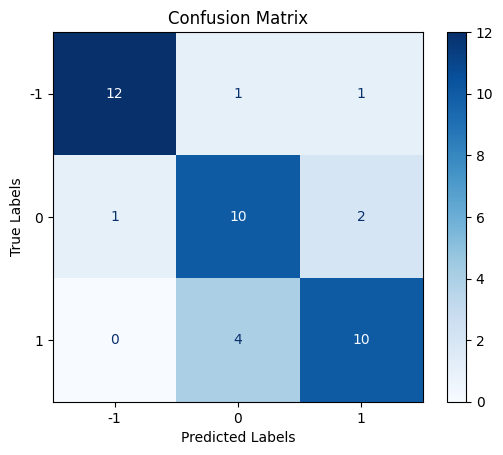

In [125]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[-1, 0, 1])
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [126]:
report = classification_report(y_test, y_pred, target_names=['-1', '0','1'])
print(report)

              precision    recall  f1-score   support

          -1       0.92      0.86      0.89        14
           0       0.67      0.77      0.71        13
           1       0.77      0.71      0.74        14

    accuracy                           0.78        41
   macro avg       0.79      0.78      0.78        41
weighted avg       0.79      0.78      0.78        41



In [127]:
import pickle

In [128]:
vectorizer_file = open("vectorizer.b", "wb")
pickle.dump(vectorizer, vectorizer_file)
nb_file = open("nb.b","wb")
pickle.dump(naivebayes, nb_file)
vectorizer_file.close()
nb_file.close()

<h4> Data Overview <h4>

In [129]:
ldf = pd.read_csv('dataset/testData90.csv')
ldf

,komentar,label
0,"Dulu sebelum di perhatikan kalian diam, gilira...",NaN
1,"Secara pribadi saran saya, jgn baper untuk mas...",NaN
2,Niat baik pemerintah membuka lahan pertanian j...,NaN
3,Tergantung bagaimana proses pemerintah terhada...,NaN
4,"Saya tak tahu harus berkata apa, pusing.",NaN
...,...,...
85,"setuju sekali untuk pemerintah, kareahkan semu...",NaN
86,"Setuju diteruskan tapi, musti diselesaikan mas...",NaN
87,"Sangat Setuju d lanjutkan proyek nya, lebih be...",NaN
88,Pemerintah ingin rakyatnya sejahtera dan tidak...,NaN


<h4> Preprocessing Data

In [130]:
ldf['komentar'] = ldf['komentar'].apply(clean_data)
ldf

,komentar,label
0,dulu perhati kalian diam gilir sekarang perhat...,NaN
1,pribadi saran jangan baper masyarakat asli pap...,NaN
2,niat baik perintah buka lahan tani jangan buat...,NaN
3,gantung bagaimana proses perintah masyarakat a...,NaN
4,tak tahu kata apa pusing,NaN
...,...,...
85,tuju sekali perintah kareahkan semua buat food...,NaN
86,tuju terus musti selesai masalah adat,NaN
87,sangat tuju d lanjut proyek nya lebih besar ma...,NaN
88,perintah rakyat sejahtera tidak kurang pangan ...,NaN


<h4> Labeling Using Naive Bayes Model

In [131]:
vectorizer = pickle.load(open("vectorizer.b", "rb"))
naivebayes = pickle.load(open("nb.b", "rb"))

In [132]:
X_toBeLabeled = vectorizer.transform(ldf['komentar'])
predicted_labels = naivebayes.predict(X_toBeLabeled)
ldf['label'] = predicted_labels
print(ldf.head())

                                            komentar  label
0  dulu perhati kalian diam gilir sekarang perhat...      1
1  pribadi saran jangan baper masyarakat asli pap...      0
2  niat baik perintah buka lahan tani jangan buat...      0
3  gantung bagaimana proses perintah masyarakat a...      0
4                           tak tahu kata apa pusing     -1


In [133]:
ldf.to_csv('dataset/labeledTestData90.csv', index=False)

<h4> Test Labeling Accuracy

In [134]:
df_labeled = pd.read_csv('dataset/labeledTestData90.csv')
df_validation = pd.read_csv('dataset/validationForLabeledTestData90.csv')

y_true = df_validation['label']
y_pred = df_labeled['label']

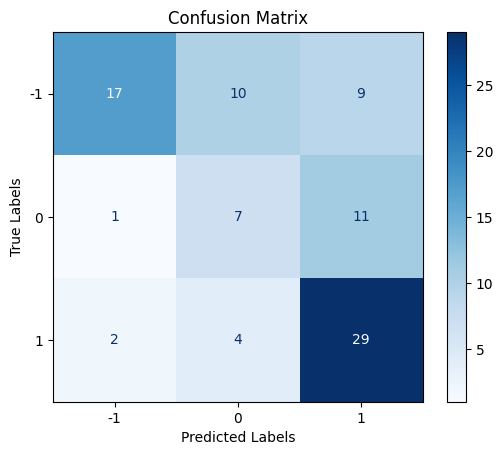

In [135]:
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sorted(df_validation['label'].unique()))
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [136]:
report = classification_report(y_true, y_pred, target_names=['-1', '0','1'])
print(report)

              precision    recall  f1-score   support

          -1       0.85      0.47      0.61        36
           0       0.33      0.37      0.35        19
           1       0.59      0.83      0.69        35

    accuracy                           0.59        90
   macro avg       0.59      0.56      0.55        90
weighted avg       0.64      0.59      0.59        90



<h4> Test Labeling Acuraccy All Data

In [137]:
df1 = pd.read_csv('dataset/trainData135.csv')
df1['komentar'] = df1['komentar'].apply(clean_data)
df2 = pd.read_csv('dataset/labeledTestData90.csv')

In [138]:
allDf = pd.concat([df1, df2], axis=0).sample(frac=1).reset_index(drop=True)
allDf

,komentar,label
0,ajar alam proyek cendana orba plg juta hektar ...,-1
1,ampas tanah oligarki brooo,-1
2,moga indonesia bagi timur jaya makmur masyarak...,0
3,harus takutin warga lokal dgn datang tni n sam...,1
4,sangat tuju proyek sebut kalau hasil tekan bia...,1
...,...,...
220,papua bangun salah gak bangun tambah salah,0
221,warga lokal papua dampak ekonomi libat dalam k...,0
222,gua tuju papua merdeka,1
223,sedih miris sekali dengar suara masyarakat pap...,-1


In [139]:
x = vectorizer.fit_transform(allDf.komentar)
y = allDf['label'] 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [140]:
naivebayes = MultinomialNB()
naivebayes.fit(X_train, y_train)

MultinomialNB()

In [141]:
y_pred = naivebayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

<h4> All Data Confussion Matrix

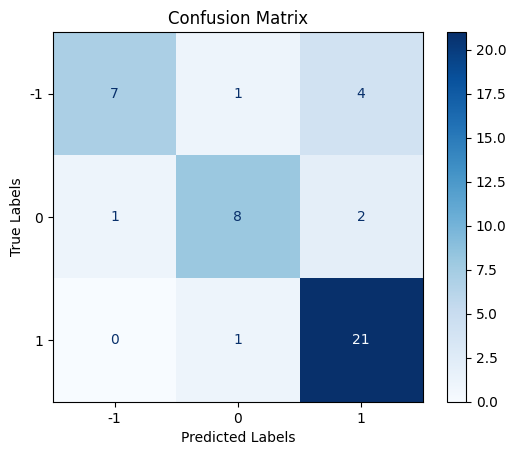

In [142]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[-1, 0, 1])
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [143]:
report = classification_report(y_test, y_pred, target_names=['-1', '0','1'])
print(report)

              precision    recall  f1-score   support

          -1       0.88      0.58      0.70        12
           0       0.80      0.73      0.76        11
           1       0.78      0.95      0.86        22

    accuracy                           0.80        45
   macro avg       0.82      0.76      0.77        45
weighted avg       0.81      0.80      0.79        45



<h4> Pie Chart

In [144]:
def PieChart(scores, labels):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.pie(scores, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.show()

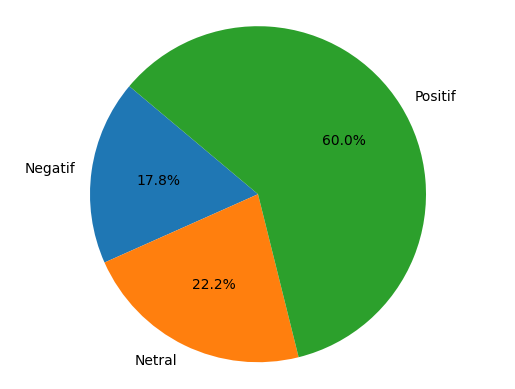

In [145]:
labels_se = ['Negatif', 'Netral', 'Positif']
scores_se = [
    sum(y_pred == -1),
    sum(y_pred == 0),
    sum(y_pred == 1)
]

PieChart(scores_se, labels_se)

<h4> Word Cloud

In [146]:
from wordcloud import WordCloud

In [147]:
negatif_comments = ' '.join(allDf[allDf['label'] == -1]['komentar'])
netral_comments = ' '.join(allDf[allDf['label'] == 0]['komentar'])
positif_comments = ' '.join(allDf[allDf['label'] == 1]['komentar'])

In [148]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

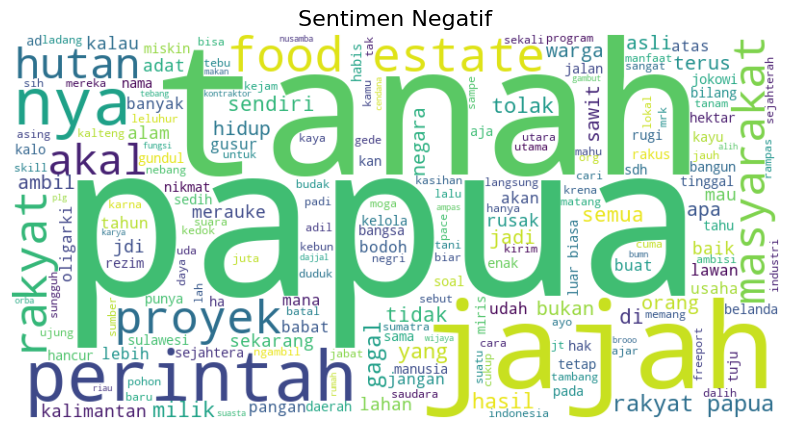

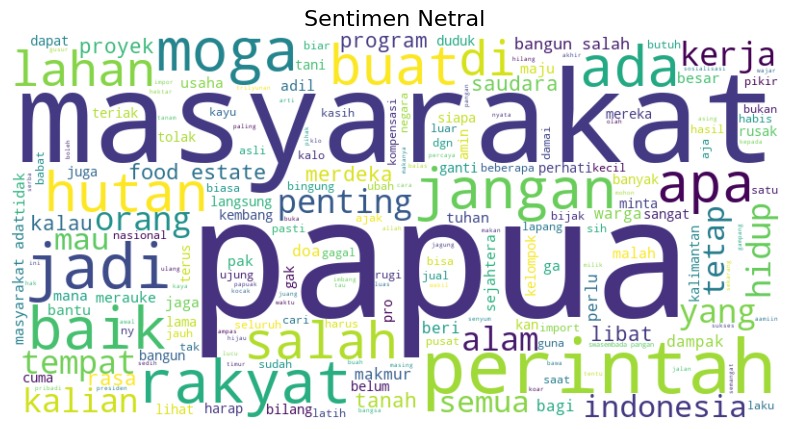

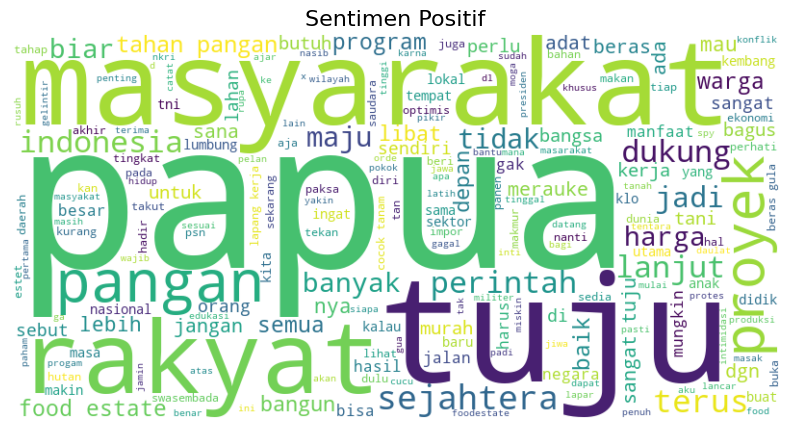

In [149]:
generate_wordcloud(negatif_comments, 'Sentimen Negatif')
generate_wordcloud(netral_comments, 'Sentimen Netral')
generate_wordcloud(positif_comments, 'Sentimen Positif')